<a href="https://colab.research.google.com/github/Desmyk/PYDATA/blob/main/Capstoneedit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium as fm
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/covid19.csv")
data

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
0,2020-01-20,Asia,KR,South Korea,All States,1,0,0,0,4,0,0,0,0
1,2020-01-22,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
2,2020-01-22,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0
3,2020-01-23,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
4,2020-01-23,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10898,2020-06-01,Asia,ID,Indonesia,All States,0,0,0,0,223624,0,0,5887,0
10899,2020-06-01,Europe,PL,Poland,All States,23987,0,11449,1065,931520,11473,0,15974,201
10900,2020-06-01,Europe,RS,Serbia,All States,11430,0,6726,244,247760,4460,468,2315,18
10901,2020-06-01,Asia,TW,Taiwan,All States,0,0,0,0,72319,0,0,237,0


In [5]:
# determine dimension of the df

dim = data.shape
dim

(10903, 14)

In [36]:
# get the column names

column_names = data.columns.tolist()

column_names

['Date',
 'Continent_Name',
 'Two_Letter_Country_Code',
 'Country_Region',
 'Province_State',
 'positive',
 'hospitalized',
 'recovered',
 'death',
 'total_tested',
 'active',
 'hospitalizedCurr',
 'daily_tested',
 'daily_positive']

In [7]:
# display first few rows

data.head()

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
0,2020-01-20,Asia,KR,South Korea,All States,1,0,0,0,4,0,0,0,0
1,2020-01-22,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
2,2020-01-22,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0
3,2020-01-23,North America,US,United States,All States,1,0,0,0,1,0,0,0,0
4,2020-01-23,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0


In [9]:
# display last few rows

data.tail()

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive
10898,2020-06-01,Asia,ID,Indonesia,All States,0,0,0,0,223624,0,0,5887,0
10899,2020-06-01,Europe,PL,Poland,All States,23987,0,11449,1065,931520,11473,0,15974,201
10900,2020-06-01,Europe,RS,Serbia,All States,11430,0,6726,244,247760,4460,468,2315,18
10901,2020-06-01,Asia,TW,Taiwan,All States,0,0,0,0,72319,0,0,237,0
10902,2020-06-01,Asia,VN,Vietnam,All States,0,0,0,0,261004,0,0,0,0


In [42]:
# display summary of the data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10903 entries, 0 to 10902
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date                     10903 non-null  object
 1   Continent_Name           10903 non-null  object
 2   Two_Letter_Country_Code  10903 non-null  object
 3   Country_Region           10903 non-null  object
 4   Province_State           10903 non-null  object
 5   positive                 10903 non-null  int64 
 6   hospitalized             10903 non-null  int64 
 7   recovered                10903 non-null  int64 
 8   death                    10903 non-null  int64 
 9   total_tested             10903 non-null  int64 
 10  active                   10903 non-null  int64 
 11  hospitalizedCurr         10903 non-null  int64 
 12  daily_tested             10903 non-null  int64 
 13  daily_positive           10903 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 1

In [13]:
# find total deaths by Country_Region

grouped_data = data.groupby('Country_Region')['death'].sum()
grouped_data

Country_Region
Albania                 0
Argentina               0
Armenia              2682
Australia           10410
Austria                 0
                   ...   
United Kingdom     863557
United States     6808745
Uruguay                 0
Venezuela               0
Vietnam                 0
Name: death, Length: 109, dtype: int64

In [15]:
# find total cases by Country_Region

group_data = data.groupby('Country_Region')['positive'].sum()
group_data

Country_Region
Albania               12279
Argentina             28220
Armenia              201371
Australia            897936
Austria              541013
                    ...    
United Kingdom      4980411
United States     133567277
Uruguay                2160
Venezuela               461
Vietnam                6450
Name: positive, Length: 109, dtype: int64

In [93]:
# find total tested by Country_Region

t_tested = data.groupby('Country_Region')['total_tested'].sum()
t_tested

Country_Region
Albania              164305
Argentina            536475
Armenia             1634541
Australia          92028873
Austria            14166167
                    ...    
United Kingdom     26041596
United States     938854656
Uruguay               91258
Venezuela           1724160
Vietnam             5066946
Name: total_tested, Length: 109, dtype: int64

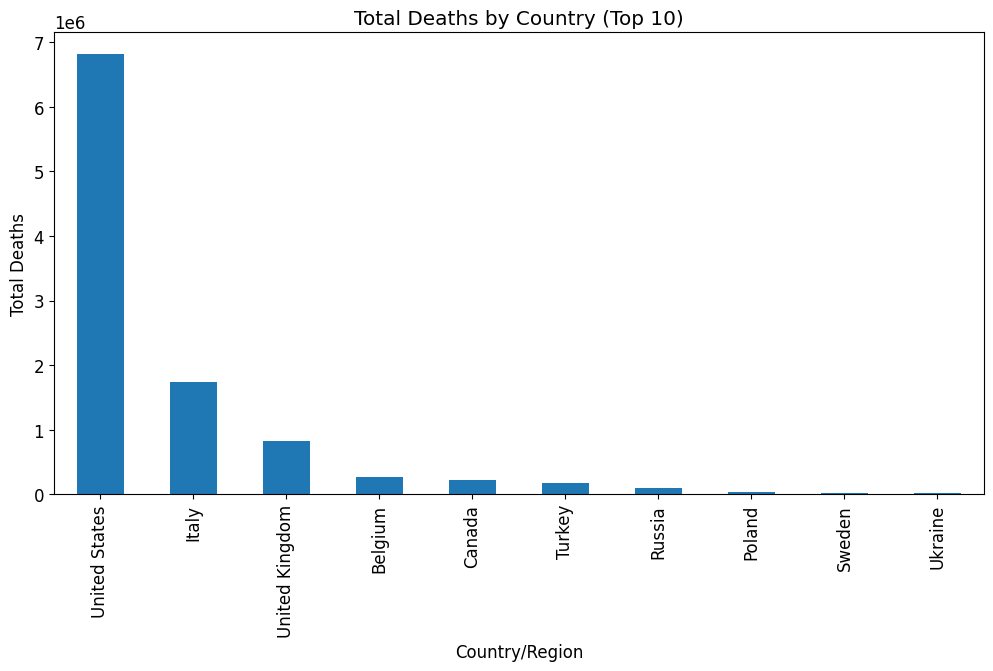

In [89]:
# Group the data by country/region and calculate the sum of deaths
grouped_data = data.groupby("Country_Region")["death"].sum()

# Sort the data by total deaths in descending order
sorted_data = grouped_data.sort_values(ascending=False)

# Extract the top 10 countries with the most deaths
top_10_countries = sorted_data.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind="bar")

# Add labels and title
plt.xlabel("Country/Region")
plt.ylabel("Total Deaths")
plt.title("Total Deaths by Country (Top 10)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

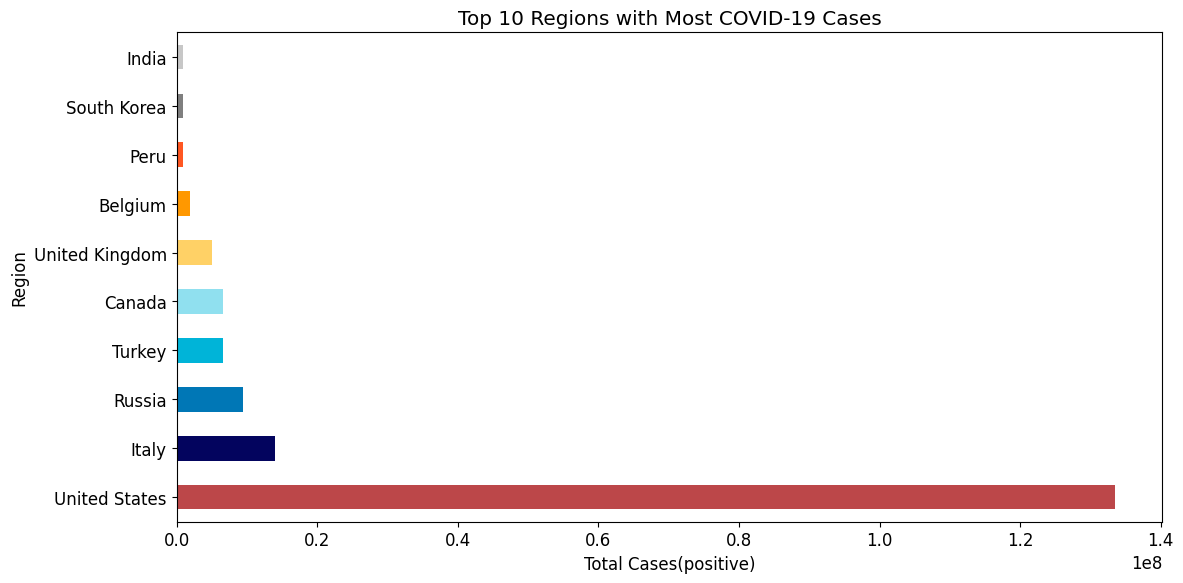

In [88]:
# Sort the data by total cases in descending order
sorted_data = group_data.sort_values(ascending=False)

# Extract the top 10 regions with the most cases
top_10_regions = sorted_data.head(10)

top_10_regions
# Increase font size
plt.rcParams['font.size'] = 12

color_palette = ["#bc4749", "#03045E", "#0077B6", "#00B4D8", "#90E0EF", "#FFD166", "#FF9800", "#FF5722", "#7F7F7F", "#C7C7C7"]

plt.figure(figsize=(12, 6))
top_10_regions.plot(kind="barh", color=color_palette)
plt.xlabel("Total Cases(positive)")
plt.ylabel("Region")
plt.title("Top 10 Regions with Most COVID-19 Cases")
plt.tight_layout()
plt.show()

In [103]:
# Calculate the positive test rate for each region
data["positive_rate"] = data["positive"] / data["total_tested"]

# Drop all rows with missing values in the 'positive' columns
data.dropna(subset=["positive_rate"], inplace=True)

# Drop all rows with missing values in the 'positive' columns
data.dropna(subset=["positive_rate"], inplace=True)

# Group the data by region and calculate the sum of positive_rate
positive_rate_region = data.groupby("Country_Region")["positive_rate"].sum()

# Sort the data by positive_rate in descending order
positive_rate_sorted = positive_rate_region.sort_values(ascending=False)

# Print the top 10 regions with the highest positive test rate
positive_rate_sorted.head(10)

# Merge the two dataframes (top ten cases and highest positive test rates)
merged_data = pd.merge(positive_rate_region, positive_rate_sorted, on="Country_Region")

# Print the merged data
merged_data

,positive_rate_x,positive_rate_y
Country_Region,,
Albania,2.624744,2.624744
Argentina,1.347901,1.347901
Armenia,10.178279,10.178279
Australia,NaN,NaN
Austria,3.124247,3.124247
...,...,...
United Kingdom,15.809919,15.809919
United States,781.945377,781.945377
Uruguay,0.244225,0.244225


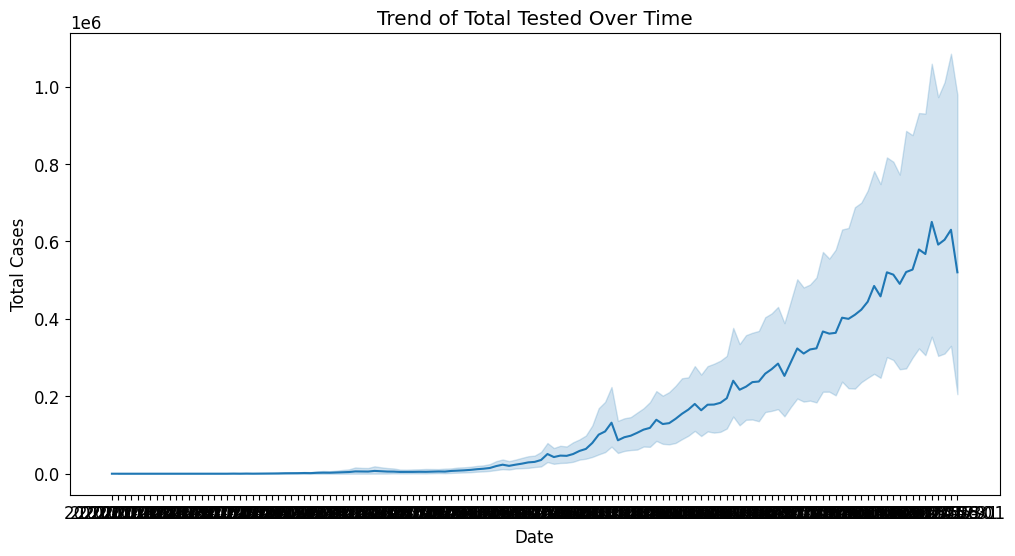

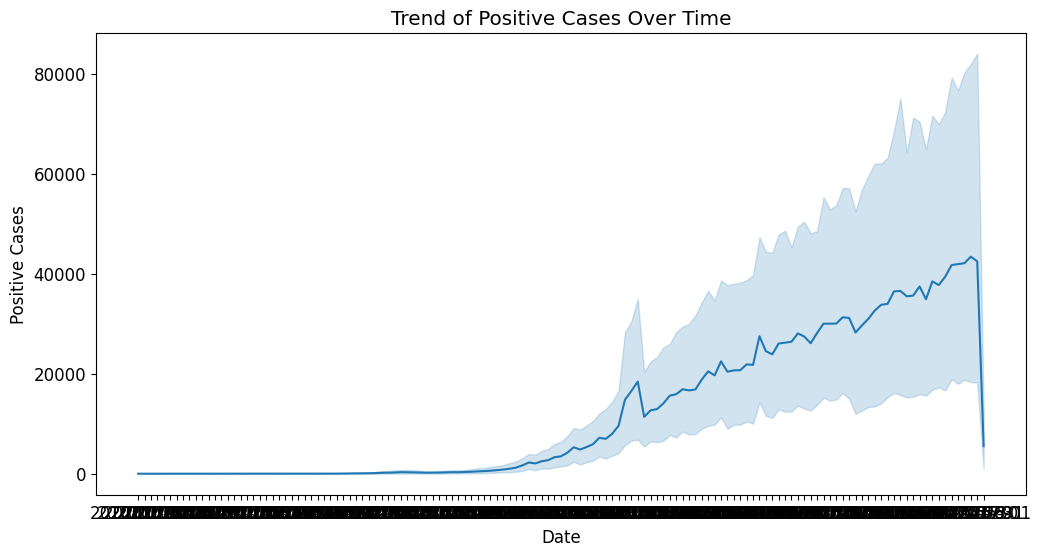

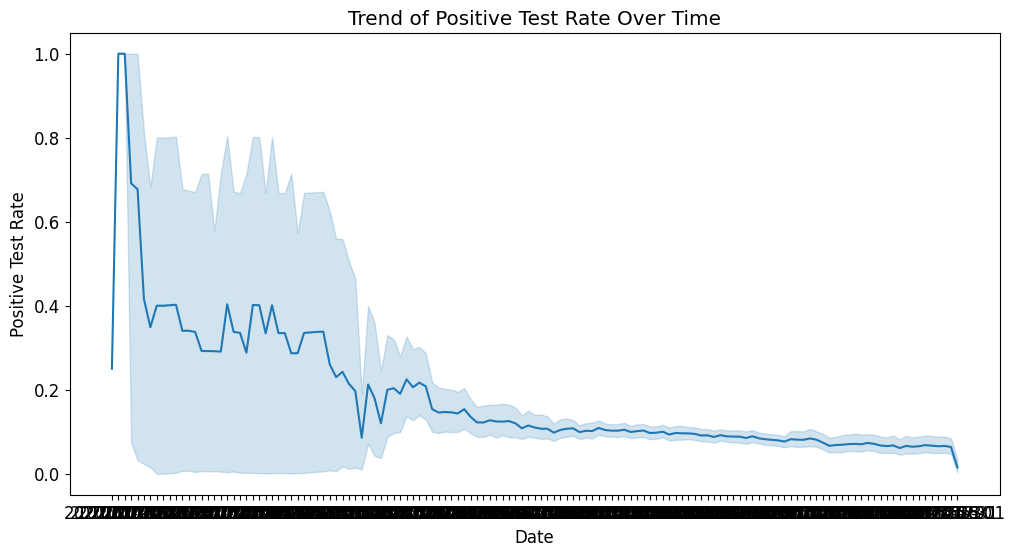

In [115]:
## Line chart for total tested over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Date", y="total_tested")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title("Trend of Total Tested Over Time")
plt.show()

# Line chart for positive cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Date", y="positive")
plt.xlabel("Date")
plt.ylabel("Positive Cases")
plt.title("Trend of Positive Cases Over Time")
plt.show()

# Line chart for positive test rate over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Date", y="positive_rate")
plt.xlabel("Date")
plt.ylabel("Positive Test Rate")
plt.title("Trend of Positive Test Rate Over Time")
plt.show()

In [128]:
# Import necessary libraries
import geopandas as gpd
import shapely

data["Continent_Name"] = data["Continent_Name"].replace("ASIA", "Asia")

# Extract the geometry information from the data
# geometry = gpd.GeoSeries.from_wkt(data["Continent_Name"])

# Create a GeoDataFrame
# geo_data = gpd.GeoDataFrame(data, geometry=geometry)

# Save the GeoDataFrame to a shapefile
# geo_data.to_file("covidgeodata.shp")

In [121]:

data["Country_Region"].duplicated().sum()
data

,Date,Continent_Name,Two_Letter_Country_Code,Country_Region,Province_State,positive,hospitalized,recovered,death,total_tested,active,hospitalizedCurr,daily_tested,daily_positive,Positive Test Rate,positive_rate
0,2020-01-20,Asia,KR,South Korea,All States,1,0,0,0,4,0,0,0,0,25.000000,0.250000
1,2020-01-22,North America,US,United States,All States,1,0,0,0,1,0,0,0,0,100.000000,1.000000
2,2020-01-22,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0,100.000000,1.000000
3,2020-01-23,North America,US,United States,All States,1,0,0,0,1,0,0,0,0,100.000000,1.000000
4,2020-01-23,North America,US,United States,Washington,1,0,0,0,1,0,0,0,0,100.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10898,2020-06-01,Asia,ID,Indonesia,All States,0,0,0,0,223624,0,0,5887,0,0.000000,0.000000
10899,2020-06-01,Europe,PL,Poland,All States,23987,0,11449,1065,931520,11473,0,15974,201,2.575039,0.025750
10900,2020-06-01,Europe,RS,Serbia,All States,11430,0,6726,244,247760,4460,468,2315,18,4.613335,0.046133
10901,2020-06-01,Asia,TW,Taiwan,All States,0,0,0,0,72319,0,0,237,0,0.000000,0.000000


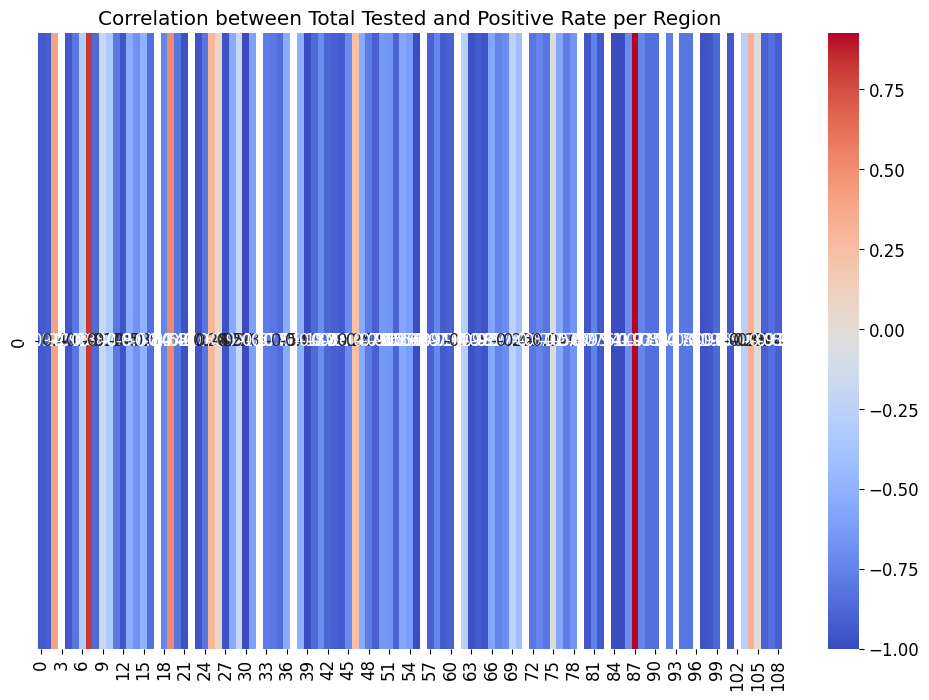

In [126]:
# Group the data by region
grouped_data = data.groupby("Country_Region")

# Calculate the correlation between total tested and positive rate
correlations = grouped_data.apply(lambda x: x["total_tested"].corr(x["positive_rate"]))

correlations

import numpy as np

# Reshape the correlations Series into a 2D DataFrame
correlations_df = correlations.to_numpy().reshape(1, -1)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlations_df, cmap="coolwarm", annot=True)
plt.title("Correlation between Total Tested and Positive Rate per Region")
plt.show()